In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-2_mess.inp")

In [2]:
from importlib import reload

from mess_io_proto import surface

reload(surface)

surf = surface.from_mess(mess_inp_file)
surface.display_network(surf)
max_path = surface.longest_path(surf)
max_path

well_id_seq = [3, 1, 0, 2, 4]
seq = [3, frozenset({1, 3}), 1, frozenset({0, 1}), 0, frozenset({0, 2}), 2, frozenset({2, 4}), 4]


[NMolWell(energy=5.87, id=3, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=False, fake=False),
 Barrier(energy=5.87, well_ids=(1, 3), name='FakeB-C5H8(522)+HO2(8)', fake=True),
 NMolWell(energy=2.87, id=1, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=True, fake=True),
 Barrier(energy=15.29, well_ids=(0, 1), name='ts_1_1', fake=False),
 UnimolWell(energy=0.0, id=0, type='unimol', name='S(722)r0'),
 Barrier(energy=10.94, well_ids=(0, 2), name='ts_1_2', fake=False),
 NMolWell(energy=-20.95, id=2, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=True, fake=True),
 Barrier(energy=-17.95, well_ids=(2, 4), name='FakeB-C5H8O(825)rs+OH(4)', fake=True),
 NMolWell(energy=-17.95, id=4, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=False, fake=False)]

<Figure size 1000x500 with 0 Axes>

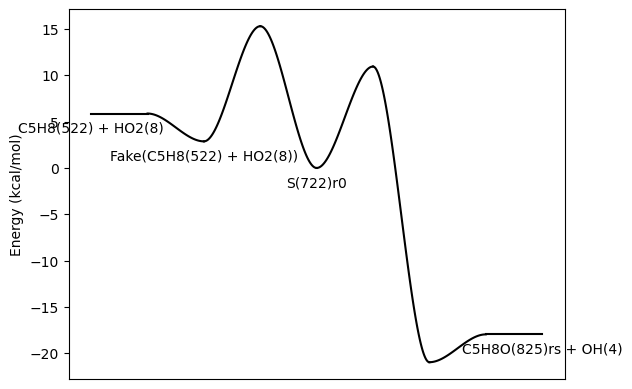

In [13]:
from importlib import reload

from matplotlib import pyplot

reload(surface)


size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

fig = surface.plot_path(max_path, fig=fig)